In [2]:
# ================================
# 📌 Cell 1: Upload and Load Dataset
# ================================
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
df.head()


Saving nutrition.csv to nutrition (1).csv


,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [3]:
# ================================
# 📌 Cell 2: Data Cleaning
# ================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to clean numeric values
def to_numeric(series):
    return pd.to_numeric(series.astype(str).str.replace(r'[^0-9\\.]', '', regex=True), errors='coerce')

# Convert selected columns
df['calories'] = to_numeric(df['calories'])
df['total_fat'] = to_numeric(df['total_fat'])
df['sugars'] = to_numeric(df['sugars'])
df['protein'] = to_numeric(df['protein'])
df['carbohydrate'] = to_numeric(df['carbohydrate'])

df[['name','calories','total_fat','sugars']].head()


,name,calories,total_fat,sugars
0,Cornstarch,381,0.1,0.00
1,"Nuts, pecans",691,72.0,3.97
2,"Eggplant, raw",25,0.2,3.53
3,"Teff, uncooked",367,2.4,1.84
4,"Sherbet, orange",144,2.0,24.32


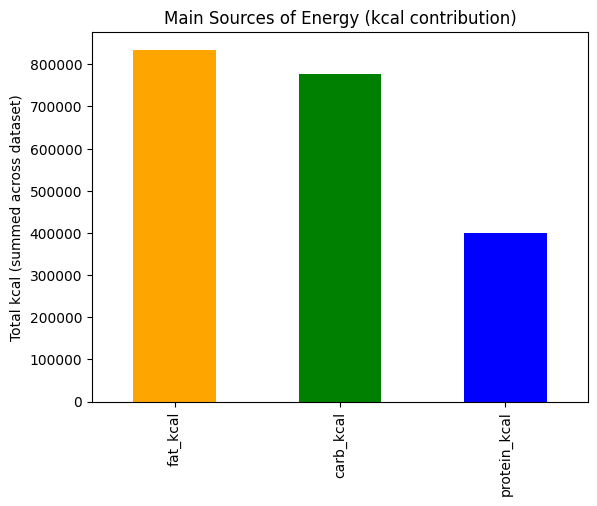

,0
fat_kcal,835057.80
carb_kcal,777718.04
protein_kcal,398866.48


In [4]:
# ================================
# 📌 Cell 3: Q1 – What are the main sources of energy?
# ================================
df['fat_kcal'] = df['total_fat'] * 9
df['carb_kcal'] = df['carbohydrate'] * 4
df['protein_kcal'] = df['protein'] * 4

macro_energy = df[['fat_kcal','carb_kcal','protein_kcal']].sum()

macro_energy.plot(kind='bar',
                  title='Main Sources of Energy (kcal contribution)',
                  color=['orange','green','blue'])
plt.ylabel("Total kcal (summed across dataset)")
plt.show()

macro_energy


In [5]:
# ================================
# 📌 Cell 4: Q2 – Which foods have the highest calories?
# ================================
df[['name','calories']].sort_values(by='calories', ascending=False).head(10)


,name,calories
2253,"Fish oil, fully hydrogenated, menhaden",902
422,"Fish oil, salmon",902
355,"Fish oil, sardine",902
256,"Fish oil, cod liver",902
293,"Fish oil, menhaden",902
318,"Fat, mutton tallow",902
430,"Fat, beef tallow",902
356,"Fish oil, herring",902
676,Lard,902
5621,"Oil, all purpose salad or cooking, industrial ...",900


Correlation between calories and total fat: 0.807
Correlation between calories and sugars: 0.316


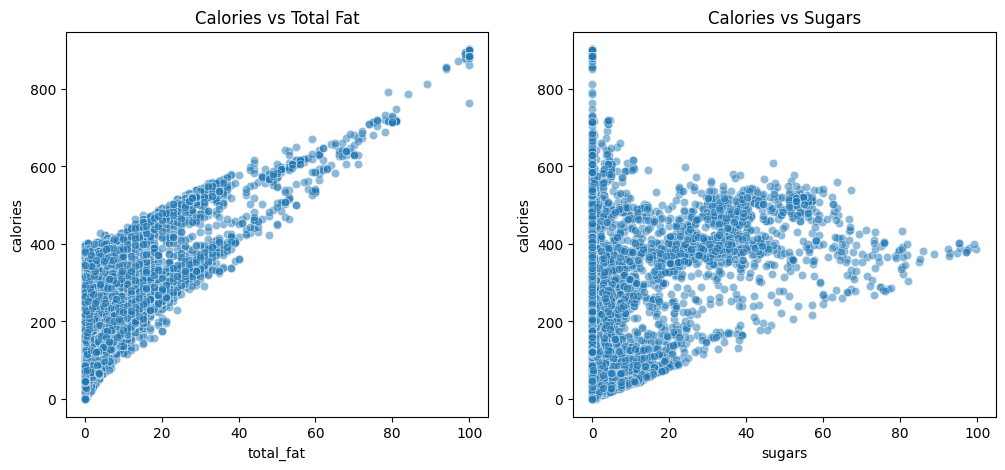

In [6]:
# ================================
# 📌 Cell 5: Q3 – Correlation calories vs fat vs sugar
# ================================
corr_fat = df['calories'].corr(df['total_fat'])
corr_sugar = df['calories'].corr(df['sugars'])

print(f"Correlation between calories and total fat: {corr_fat:.3f}")
print(f"Correlation between calories and sugars: {corr_sugar:.3f}")

fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.scatterplot(x='total_fat', y='calories', data=df, ax=ax[0], alpha=0.5)
ax[0].set_title("Calories vs Total Fat")
sns.scatterplot(x='sugars', y='calories', data=df, ax=ax[1], alpha=0.5)
ax[1].set_title("Calories vs Sugars")
plt.show()


In [7]:
# ================================
# 📌 Cell 6: Summary & Insights
# ================================
from IPython.display import Markdown

Markdown("""
# ✅ Summary & Insights

1. **Main energy source:** Compare the kcal contributions from fat, carbs, and protein.
2. **Highest calorie foods:** Top 10 highest-calorie foods identified.
3. **Correlation:** Calories correlate more strongly with **total fat** than with **sugars**, making fat a stronger predictor of calorie density.
""")



# ✅ Summary & Insights

1. **Main energy source:** Compare the kcal contributions from fat, carbs, and protein.
2. **Highest calorie foods:** Top 10 highest-calorie foods identified.
3. **Correlation:** Calories correlate more strongly with **total fat** than with **sugars**, making fat a stronger predictor of calorie density.
